## Necessary Packages
* __numpy__ package is for working with arrays, matrix, vectors etc. This is so handy for performing matrix operations
and Linear Algebra calculation.
* __pandas__ stands for **_Python and data analysis_**. This package is extremly useful for dealing with dataset.
* __matplotlib__ is a Python 2D plotting library that helps us to plot the dataset in various way. The easiest and basic plots are line, scatter and histogram plots.
    * Line plot is better when x axis is time.
    * Scatter is better when there is correlation between two variables
    * Histogram is better when we need to see distribution of numerical data
* __Seaborn__ is a Python data visualization library based on __matplotlib__. It provides a high-level interface for drawing attractive and informative statistical graphics.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [148]:
# load dataset
dataset = pd.read_csv(r"C:\Users\DIU\Desktop\pokemon.csv")

In [3]:
# display first 5 rows
dataset.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


#### DataFrame.describe() :

The `describe()` method tells us a lot of things about the dataset. One important is that `describe()` method deals only with numeric valued features. That's why it doesn't display `Name`, `Type 1`, and `Type 2` features description.

Now, let's get a deeper understanding of describe() method.
* `Count` tells us the number of NoN-empty rows in a feature.

* `mean` tells us the mean value of each feature.

* `std` tells us the Standard Deviation Value of each feature.

* `min` tells us the minimum value of each feature.

* `25%`, `50%`, and `75%` are the percentile/quertile of each features. This quertile information helps us to detect Outliers.

* `max` tells us the maximum value of each feature.


In [4]:
dataset.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [5]:
# deleting feature from dataset
del dataset["#"]

In [8]:
# showing column names
print(dataset.columns)

# length of columns
print(len(dataset.columns))

Index(['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')
11


The `info()` does a pretty good job. It can handle any kind of data.  By using `info()` method we can know the data types of each and feature, and can find out the number missing values.

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


In [14]:
# the shape of the dataset
dataset.shape

(800, 11)

In [10]:
type(dataset["Defense"]), type(dataset)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

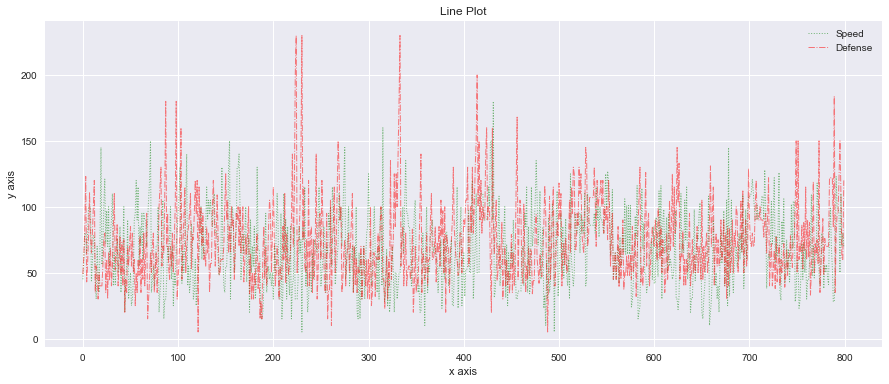

In [7]:
# line plot
plt.subplots(figsize=(15,6))

dataset.Speed.plot(kind = 'line', color = 'g', label = 'Speed', linewidth = 1, alpha = 0.5, grid = True, linestyle = ':')
dataset.Defense.plot(color = 'r', label = 'Defense', linewidth = 1, alpha = 0.5, grid = True, linestyle = '-.')
plt.legend(loc='upper right')     
plt.xlabel('x axis')            
plt.ylabel('y axis')
plt.title('Line Plot')
plt.show()

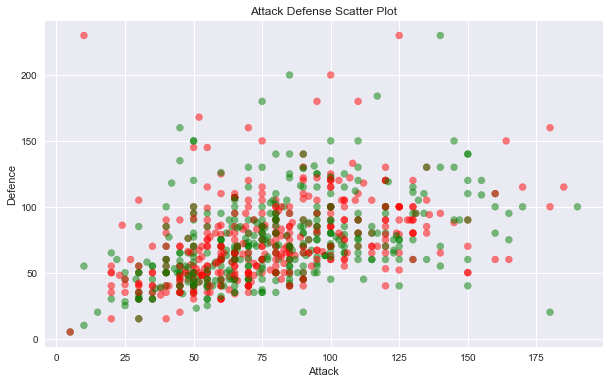

In [8]:
# scatter plot
plt.subplots(figsize=(10,6))
plt.scatter(x=dataset['Attack'], y=dataset['Defense'],alpha = 0.5, color = ["red", "green"])
plt.xlabel('Attack')             
plt.ylabel('Defence')
plt.title('Attack Defense Scatter Plot')
plt.show()

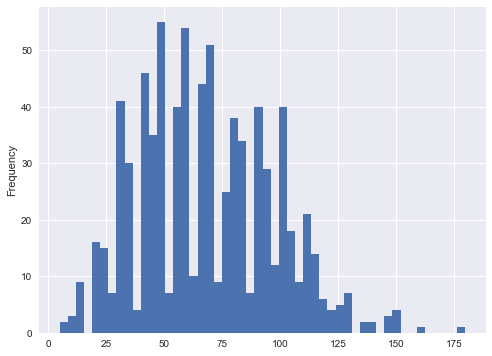

In [9]:
# histogram
dataset.Speed.plot(kind = 'hist',bins = 50,figsize = (8,6))
plt.show()

In [10]:
# Performing logical operation

x = dataset['Defense'] > 200     # There are only 3 pokemons who have higher defense value than 200

dataset[x]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [11]:
# performing logical_and

# There are only 2 pokemons who have higher defence value than 200 and higher attack value than 100

dataset[np.logical_and(dataset['Defense']>200, dataset['Attack']>100 )]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [12]:
# we can do the exact same thing with single `&` instead of np.logical_and.

dataset[(dataset['Defense']>200) & (dataset['Attack']>100)]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


#### Categorize values in a Feature

In [18]:
dataset["Type 1"].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

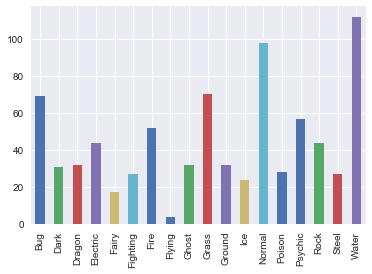

In [21]:
# plot all the categories for better visualization
dataset["Type 1"].value_counts().sort_index().plot.bar()

In [90]:
# creating DataFrame
# DataFrame for student info

name = ["Sujan", "Ajman", "Rahat", "Roni", "Chandan", "Sajeeb", "Rifat", "Sifat", "Hussain", "Tonmoy"]
math = [90, 80, 60, 80, 88, 33, 28, 99, 87, 77]
english = [60, 70, 50, 80, 83, 38, 90, 49, 47, 88]
physics = [90, 76, 59, 86, 45, 78, 85, 59, 69, 67]

result_scores = pd.DataFrame(data = [name, math, english, physics])
result_scores

,0,1,2,3,4,5,6,7,8,9
0,Sujan,Ajman,Rahat,Roni,Chandan,Sajeeb,Rifat,Sifat,Hussain,Tonmoy
1,90,80,60,80,88,33,28,99,87,77
2,60,70,50,80,83,38,90,49,47,88
3,90,76,59,86,45,78,85,59,69,67


In [91]:
# transpose the DataFrame
result_scores = pd.DataFrame(data = [name, math, english, physics]).transpose()
result_scores

,0,1,2,3
0,Sujan,90,60,90
1,Ajman,80,70,76
2,Rahat,60,50,59
3,Roni,80,80,86
4,Chandan,88,83,45
5,Sajeeb,33,38,78
6,Rifat,28,90,85
7,Sifat,99,49,59
8,Hussain,87,47,69
9,Tonmoy,77,88,67


In [92]:
# adding columns name
result_scores.columns = ["name", "math", "english", "physics"]

In [93]:
result_scores

,name,math,english,physics
0,Sujan,90,60,90
1,Ajman,80,70,76
2,Rahat,60,50,59
3,Roni,80,80,86
4,Chandan,88,83,45
5,Sajeeb,33,38,78
6,Rifat,28,90,85
7,Sifat,99,49,59
8,Hussain,87,47,69
9,Tonmoy,77,88,67


In [98]:
# Select specific columns
result_scores["name"]

0      Sujan
1      Ajman
2      Rahat
3       Roni
4    Chandan
5     Sajeeb
6      Rifat
7      Sifat
8    Hussain
9     Tonmoy
Name: name, dtype: object

In [99]:
# select multiple columns
result_scores[["name", "math"]]

,name,math
0,Sujan,90
1,Ajman,80
2,Rahat,60
3,Roni,80
4,Chandan,88
5,Sajeeb,33
6,Rifat,28
7,Sifat,99
8,Hussain,87
9,Tonmoy,77


In [103]:
# another way of selecting columns
# iloc[start row : end row, start column:end column]
# if we do not set start and end row then it means we want all the rows, same as for the start column and end column 
# iloc[:, 2:4] => means select all rows and columns between 2 to 4. 

result_scores.iloc[:, 2:4]

,english,physics
0,60,90
1,70,76
2,50,59
3,80,86
4,83,45
5,38,78
6,90,85
7,49,59
8,47,69
9,88,67
